In [16]:
import tensorflow as tf
import numpy as np
import sys

from magenta.common import tf_lib

In [17]:
from magenta.models.rl_tuner import rl_tuner
from magenta.models.rl_tuner import rl_tuner_ops

In [9]:
rl_tuner_hparams = tf_lib.HParams(random_action_probability=0.1,    
                               store_every_nth=1,
                               train_every_nth=5,
                               minibatch_size=32,
                               discount_rate=0.5,
                               max_experience=100000,
                               target_network_update_rate=0.01)

In [10]:
SAVE_PATH = "/home/andrew/Git/rl_comps/psi/"

In [11]:
# Model parameter settings
ALGORITHM = 'psi'
REWARD_SCALER = 1.0 # The weight placed on music theory rewards, i.e. r_MT * reward_scalar. 
OUTPUT_EVERY_NTH = 50000 # The number of steps before the model evaluates itself and stores a checkpoint
NUM_NOTES_IN_COMPOSITION = 300
PRIME_WITH_MIDI = False

In [12]:
psi_rl_net = rl_tuner.RLTuner(SAVE_PATH, 
                          dqn_hparams=rl_tuner_hparams, 
                          algorithm=ALGORITHM,
                          reward_scaler=REWARD_SCALER,
                          output_every_nth=OUTPUT_EVERY_NTH,
                          num_notes_in_melody=NUM_NOTES_IN_COMPOSITION)

Retrieving checkpoint of Note RNN from Magenta download server.
INFO:tensorflow:Initializing q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing target q network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope target_q_network
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Initializing reward network
INFO:tensorflow:Using custom hparams
INFO:tensorflow:Initializing melody RNN graph for scope reward_rnn
Instructions for updating:
Please use tf.global_variables instead.
INFO:tensorflow:Q network cell: <tensorflow.python.ops.rnn_cell.MultiRNNCell object at 0x7fd7d7508390>
INFO:tensorflow:Adding RL graph variables
INFO:tensorflow:Adding reward computation portion of the graph
INFO:tensorflow:Adding taking action portion of graph
Instructions for updating:


In [13]:
psi_rl_net.restore_from_directory(directory=SAVE_PATH, checkpoint_name="psi.ckpt-950000")

Attempting to restore from checkpoint /home/andrew/Git/rl_comps/psi/psi.ckpt-950000
INFO:tensorflow:Attempting to restore from checkpoint /home/andrew/Git/rl_comps/psi/psi.ckpt-950000


INFO:tensorflow:Priming with note 31
INFO:tensorflow:Generated sequence: [0, 0, 30, 0, 0, 21, 0, 0, 21, 0, 0, 21, 0, 21, 0, 0, 26, 0, 0, 24, 0, 0, 18, 0, 21, 0, 0, 27, 0, 26, 0, 25, 0, 27, 0, 30, 0, 0, 21, 0, 0, 21, 0, 0, 16, 0, 30, 0, 0, 24, 0, 0, 21, 0, 18, 0, 16, 21, 0, 18, 0, 0, 9, 0, 0, 25, 0, 25, 25, 0, 0, 16, 0, 25, 0, 9, 0, 0, 16, 0, 33, 0, 0, 18, 0, 18, 0, 25, 0, 21, 0, 0, 25, 0, 27, 0, 0, 25, 21, 0, 0, 21, 0, 0, 25, 0, 0, 30, 0, 30, 0, 25, 0, 0, 26, 0, 0, 21, 0, 0, 30, 0, 26, 0, 0, 33, 0, 25, 0, 0, 26, 0, 25, 0, 0, 26, 0, 0, 21, 0, 34, 0, 30, 0, 26, 0, 18, 0, 26, 0, 0, 25, 0, 0, 28, 0, 14, 0, 16, 0, 19, 0, 27, 0, 30, 0, 21, 0, 0, 24, 0, 26, 0, 0, 26, 0, 0, 14, 0, 0, 18, 0, 18, 0, 25, 0, 26, 0, 28, 0, 25, 0, 26, 0, 0, 25, 0, 0, 27, 0, 0, 18, 0, 0, 24, 0, 0, 21, 0, 0, 15, 0, 27, 0, 0, 26, 0, 0, 26, 0, 21, 0, 0, 26, 26, 0, 0, 26, 0, 7, 18, 0, 0, 16, 0, 19, 0, 9, 0, 0, 9, 0, 0, 11, 0, 0, 16, 0, 11, 0, 16, 0, 26, 0, 16, 0, 8, 0, 0, 7, 0, 0, 9, 0, 0, 9, 0, 11, 0, 15, 0, 21, 0, 11, 

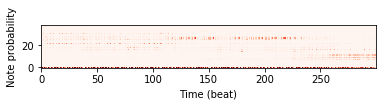

In [14]:
psi_rl_net.generate_music_sequence(visualize_probs=True, title='my_psi_rl')

In [ ]:
# Compute statistics about how well the model adheres to the music theory rules.
psi_stat_dict = psi_rl_net.evaluate_music_theory_metrics(num_compositions=100)